# リポジトリクローン

In [1]:
%cd /content
!rm -rf DEIM
!git clone https://github.com/ShihuaHuang95/DEIM
%cd DEIM

/content


Exception in thread Thread-3 (attachment_entry):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.11/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise_exception("{0}() failed:", func.__name__, level="info")
  File "/usr/local/lib/python3.11/dist-packages/debugpy/server/api.py", line 141, in debug
    return func(address, settrace_kwargs, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/debugpy/server/ap

Cloning into 'DEIM'...
remote: Enumerating objects: 380, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 380 (delta 34), reused 33 (delta 32), pack-reused 336 (from 2)
Receiving objects: 100% (380/380), 1.54 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/content/DEIM


# パッケージインストール

In [2]:
!pip install -q faster-coco-eval
!pip install -q calflops onnx onnxruntime onnxsim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

# データセット準備（VOC→COCO形式）

In [3]:
%cd /content
!git clone https://github.com/Kazuhito00/YOLOX-Colaboratory-Training-Sample.git
!git clone https://github.com/Kazuhito00/convert_voc_to_coco.git
%cd DEIM

/content
Cloning into 'YOLOX-Colaboratory-Training-Sample'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 22), reused 18 (delta 18), pack-reused 161 (from 1)
Receiving objects: 100% (187/187), 30.13 MiB | 39.97 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Cloning into 'convert_voc_to_coco'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 27 (delta 12), reused 14 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 11.77 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/DEIM


In [4]:
dataset_directory = '/content/YOLOX-Colaboratory-Training-Sample/02.annotation_data'

In [5]:
import os

# 学習/検証データパス(train/validation data path)
train_directory = './train'
validation_directory = './validation'

# 学習データ格納ディレクトリ作成(Create training data storage directory)
os.makedirs(train_directory, exist_ok=True)
# 検証データ格納ディレクトリ作成(Create verification data storage directory)
os.makedirs(validation_directory, exist_ok=True)

In [6]:
import glob
import shutil
import random

# 学習データの割合(Percentage of training data)
train_ratio = 0.8

# コピー元ファイルリスト取得(Get copy source file list)
annotation_list = sorted(glob.glob(dataset_directory + '/*.xml'))
image_list = sorted(glob.glob(dataset_directory + '/*.jpg'))

file_num = len(annotation_list)

# インデックスシャッフル(shuffle)
index_list = list(range(file_num - 1))
random.shuffle(index_list)

for count, index in enumerate(index_list):
    if count < int(file_num * train_ratio):
        # 学習用データ(Training Data)
        shutil.copy2(annotation_list[index], train_directory)
        shutil.copy2(image_list[index], train_directory)
    else:
        # 検証用データ(Validation Data)
        shutil.copy2(annotation_list[index], validation_directory)
        shutil.copy2(image_list[index], validation_directory)

In [7]:
# Pascal VOC形式 を MS COCO形式へ変換
!python ../convert_voc_to_coco/convert_voc_to_coco.py \
    train train/train_annotations.json \
    --start_image_id=0
!python ../convert_voc_to_coco/convert_voc_to_coco.py \
    validation validation/validation_annotations.json \
    --start_image_id=10000000

Number of xml files: 40
Convert XML to JSON: 100% 40/40 [00:00<00:00, 9488.30it/s]
{'Fish': 220}
Success: train/train_annotations.json
Number of xml files: 9
Convert XML to JSON: 100% 9/9 [00:00<00:00, 8294.60it/s]
{'Fish': 49}
Success: validation/validation_annotations.json


# 学習設定yml準備

In [8]:
%%writefile my_deim_hgnetv2_s.yml

# configs/deim_dfine/deim_hgnetv2_s_coco.yml を参考

__include__: [
  'configs/deim_dfine/dfine_hgnetv2_s_coco.yml',  # 変更
  'configs/base/deim.yml'                         # 変更
]


output_dir: ./output/my_deim_hgnetv2_s            # 変更


optimizer:
  type: AdamW
  params:
    -
      params: '^(?=.*backbone)(?!.*bn).*$'
      lr: 0.0002
    -
      params: '^(?=.*(?:norm|bn)).*$'     # except bias
      weight_decay: 0.

  lr: 0.0004
  betas: [0.9, 0.999]
  weight_decay: 0.0001


# Increase to search for the optimal ema
epoches: 132 # 120 + 4n

## Our LR-Scheduler
flat_epoch: 64    # 4 + epoch // 2, e.g., 40 = 4 + 72 / 2
no_aug_epoch: 12

## Our DataAug
train_dataloader:
  dataset:
    transforms:
      policy:
        epoch: [4, 64, 120]   # list

  collate_fn:
    mixup_epochs: [4, 64]
    stop_epoch: 120


# 以下、追加
num_classes: 2                                          # 変更(実際のクラス数+1を設定)
remap_mscoco_category: False                            # 変更

train_dataloader:
  total_batch_size: 4                                   # 変更
  dataset:
    img_folder: ./train/                                # 変更
    ann_file: ./train/train_annotations.json            # 変更

val_dataloader:
  total_batch_size: 4                                   # 変更
  dataset:
    img_folder: ./validation/                           # 変更
    ann_file: ./validation/validation_annotations.json  # 変更

Writing my_deim_hgnetv2_s.yml


# 学習実施

In [9]:
!CUDA_VISIBLE_DEVICES=0 torchrun --nproc_per_node=1 train.py -c my_deim_hgnetv2_s.yml --use-amp --seed=0 2>&1 | tee train_log.txt

2025-03-02 06:34:18.541368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740897258.562350    2052 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740897258.568714    2052 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 06:34:18.589628: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Initialized distributed mode...
cfg:  {'task': 'detection', '_model': None, '_postprocessor': None, '_criterion': Non

# ONNX出力

In [10]:
!python tools/deployment/export_onnx.py \
    -c my_deim_hgnetv2_s.yml \
    -r output/my_deim_hgnetv2_s/best_stg2.pth

2025-03-02 06:45:08.607737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740897908.628047   16140 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740897908.634229   16140 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 06:45:08.654956: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/content/DEIM/tools/deployment/export_onnx.py:28: FutureWarning: You are using `torch.load` with `weights_only=False`

In [11]:
!cp output/my_deim_hgnetv2_s/best_stg2.onnx deim_hgnetv2_s.onnx

# 推論テスト

In [12]:
import onnxruntime

# モデル読み込み
onnx_session = onnxruntime.InferenceSession(
    'deim_hgnetv2_s.onnx',
    providers=[
        'CPUExecutionProvider',
    ],
)
input_size = onnx_session.get_inputs()[0].shape
input_width, input_height = input_size[3], input_size[2]

print(onnx_session.get_providers())
print('input size:',input_size)

['CPUExecutionProvider']
input size: ['N', 3, 640, 640]


In [13]:
import cv2
import numpy as np

# 画像読み込み
image = cv2.imread('/content/YOLOX-Colaboratory-Training-Sample/02.annotation_data/000001.jpg')
image_height, image_width, _ = image.shape
original_size = np.array([[image_width, image_height]], dtype=np.int64)

# 前処理：BGR->RGB、リサイズ、正規化、NCHW
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (input_width, input_height))
input_image = input_image.astype(np.float32) / 255.0
input_image = np.transpose(input_image, (2, 0, 1))
input_image = np.expand_dims(input_image, axis=0)

In [14]:
%%time

# 推論
output = onnx_session.run(
    None,
    input_feed={'images': input_image, "orig_target_sizes": original_size}
)

labels, bboxes, scores = output

CPU times: user 665 ms, sys: 27.8 ms, total: 693 ms
Wall time: 177 ms


# 結果確認

In [15]:
import copy

# 描画
debug_image = copy.deepcopy(image)
score_threshold = 0.3

for label, bbox, score in zip(labels[0], bboxes[0], scores[0]):
    if score < score_threshold:
        continue

    cv2.rectangle(
        debug_image,
        (int(bbox[0]), int(bbox[1])),
        (int(bbox[2]), int(bbox[3])),
        (0, 255, 0),
        2,
    )
    cv2.putText(
        debug_image,
        str(label),
        (int(bbox[0]), int(bbox[1]-8)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        2,
    )

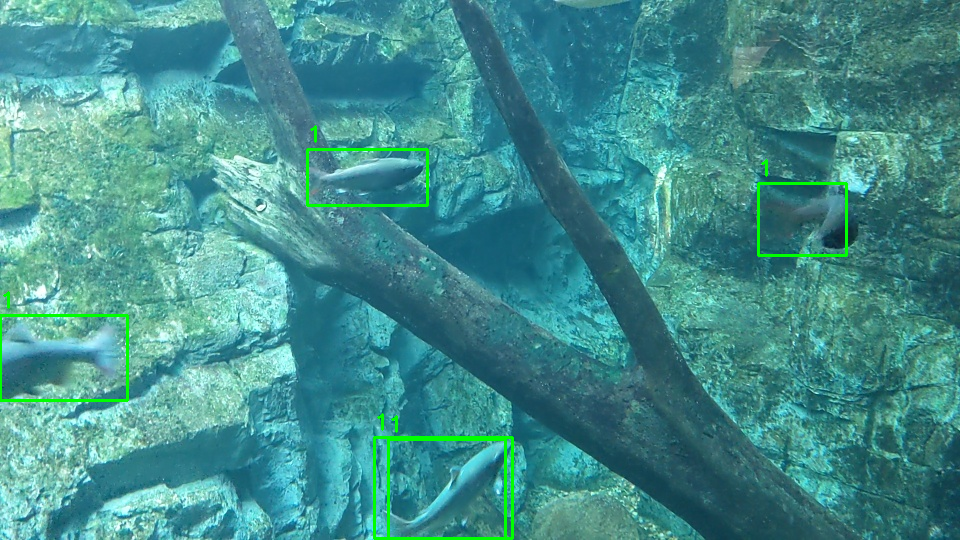

In [16]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)